In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy as np

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

## Univariate

In [3]:
x = numpy.random.normal(10, 1, size=100)

d4 = NormalDistribution.from_samples(x)
d5 = ExponentialDistribution.from_samples(x)
d6 = LogNormalDistribution.from_samples(x)

## Multivariate

In [14]:
x = numpy.random.normal(10, 1, size=(1000, 3))

# Joint probability distribution
d7 = MultivariateGaussianDistribution.from_samples(x)
d7.mu, d7.cov

(array([9.95839176, 9.99788739, 9.95082785]),
 array([[ 0.91194877,  0.06060277,  0.0608286 ],
        [ 0.06060277,  0.98252142, -0.01882238],
        [ 0.0608286 , -0.01882238,  1.0548181 ]]))

If conmponents are independent:

In [15]:
d8 = IndependentComponentsDistribution([d4, d5, d6])
d8

{
    "class" : "Distribution",
    "name" : "IndependentComponentsDistribution",
    "parameters" : [
        [
            {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    10.05980801553448,
                    1.0078822447166023
                ],
                "frozen" : false
            },
            {
                "class" : "Distribution",
                "name" : "ExponentialDistribution",
                "parameters" : [
                    0.09940547566677038
                ],
                "frozen" : false
            },
            {
                "class" : "Distribution",
                "name" : "LogNormalDistribution",
                "parameters" : [
                    2.303462554064328,
                    0.1012880395101563
                ],
                "frozen" : false
            }
        ],
        [
            1.0,
            1.0,
            1.0
    

If we wanted to learn a multivariate Gaussian distribution but with a forced diagonal covariance matrix we can model each feature are independent normal distributions, like such.

In [16]:
d8.from_samples(x, distributions=NormalDistribution)

{
    "class" : "Distribution",
    "name" : "IndependentComponentsDistribution",
    "parameters" : [
        [
            {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    9.95839176357832,
                    0.954960088815912
                ],
                "frozen" : false
            },
            {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    9.997887391813991,
                    0.9912221841076071
                ],
                "frozen" : false
            },
            {
                "class" : "Distribution",
                "name" : "NormalDistribution",
                "parameters" : [
                    9.95082784885623,
                    1.0270433769267284
                ],
                "frozen" : false
            }
        ],
        [
            1.0,
          

## Plotting

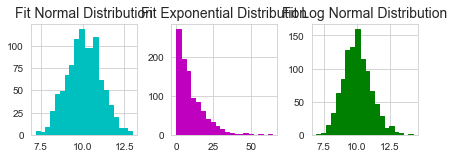

In [19]:
# plt.figure(figsize=(12, 4))
# plt.subplot(231)
# plt.title("Normal Distribution", fontsize=14)
# d.plot(1000, edgecolor='c', color='c', bins=20)

# plt.subplot(232)
# plt.title("Exponential Distribution", fontsize=14)
# d2.plot(1000, edgecolor='m', color='m', bins=20)

# plt.subplot(233)
# plt.title("Log Normal Distribution", fontsize=14)
# d3.plot(1000, edgecolor='g', color='g', bins=20)

plt.subplot(234)
plt.title("Fit Normal Distribution", fontsize=14)
d4.plot(1000, edgecolor='c', color='c', bins=20)

plt.subplot(235)
plt.title("Fit Exponential Distribution", fontsize=14)
d5.plot(1000, edgecolor='m', color='m', bins=20)

plt.subplot(236)
plt.title("Fit Log Normal Distribution", fontsize=14)
d6.plot(1000, edgecolor='g', color='g', bins=20)

plt.tight_layout()
plt.show()

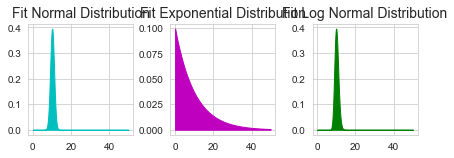

In [21]:
x1 = numpy.arange(-1, 11.1, 0.1)
x2 = numpy.arange(0, 2, 0.1)
x3 = numpy.arange(0, 50, 0.1)

# plt.figure(figsize=(14, 3))
# plt.subplot(231)
# plt.title("Normal Distribution", fontsize=14)
# plt.fill_between(x1, 0, d.probability(x1), color='c')

# plt.subplot(232)
# plt.title("Exponential Distribution", fontsize=14)
# plt.fill_between(x2, 0, d2.probability(x2), color='m')

# plt.subplot(233)
# plt.title("Log Normal Distribution", fontsize=14)
# plt.fill_between(x3, 0, d3.probability(x3), color='g')

plt.subplot(234)
plt.title("Fit Normal Distribution", fontsize=14)
plt.fill_between(x3, 0, d4.probability(x3), color='c')

plt.subplot(235)
plt.title("Fit Exponential Distribution", fontsize=14)
plt.fill_between(x3, 0, d5.probability(x3), color='m')

plt.subplot(236)
plt.title("Fit Log Normal Distribution", fontsize=14)
plt.fill_between(x3, 0, d6.probability(x3), color='g')

plt.tight_layout()
plt.show()

## Fitting 

This method uses maximum likelihood estimates to derive new parameters and is not affected by the current values of the distribution unless an inertia is set, which defines the proportion of the original distribution to use, the default being 0.

In [23]:
X = numpy.random.normal(6, 2, size=1000,)

d = NormalDistribution(100, 1)
d.fit(X)
d

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        5.959521221107845,
        2.0190653027880714
    ],
    "frozen" : false
}

In [24]:
d = NormalDistribution(100, 1)
d.fit(X, inertia=0.5)
d

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        52.979760610553924,
        1.5095326513940357
    ],
    "frozen" : false
}

### Weighted

In [26]:
X = numpy.random.normal(5, 2, size=100,)
X[50:] += 4

w = numpy.ones(100)
w[:50] = 0.25

d = NormalDistribution(10, 1)
d.fit(X, w)
d

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        8.257675608991768,
        2.304585380876173
    ],
    "frozen" : false
}

## Discrete distributions

In [30]:
d = DiscreteDistribution({'A': 0.1, 'C': 0.25, 'G': 0.50, 'T': 0.15})
print(d.probability( 'A'))
print(d.probability( 'G'))
print(d.probability('????'))

0.1
1.5
0.0


In [32]:
X = list('ACGATACACTGAATGACAGCAGTCACTGACAGTAGTACGAGTAGTAGCAGAGAGTAATAAAGAATTAATATATGACACTACGAAAAAAATGCATCG')

d.fit(X)

print(d.parameters[0])
print(1. * numpy.unique(X, return_counts=True)[1] / len(X))

{'A': 0.4375, 'C': 0.15625, 'G': 0.20833333333333334, 'T': 0.19791666666666666}
[0.4375     0.15625    0.20833333 0.19791667]


## The Kernel Density

The Gaussian Kernel Density is a non-parametric distribution that, instead of parameters, stores the data points that it was trained on directly. When initializing a kernel density you simply pass in the points. These points are converted to a probability distribution by essentially dropping some probability distribution on top of each point and then dividing the density by the number of points, ensuring that the area still integrates to 1. We can see this in action with the Gaussian kernel density which drops a normal distribution on each point with standard deviation equal to the bandwidth.

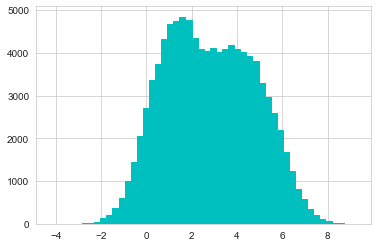

In [33]:
d = GaussianKernelDensity( [0.5, 1.2, 4.2, 1.9, 5.4, 3.4], bandwidth=1 )
d.plot(n=100000, edgecolor='c', color='c', bins=50)
plt.show()

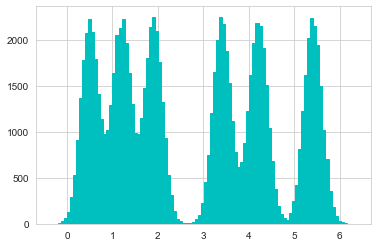

In [43]:
d = GaussianKernelDensity( [0.5, 1.2, 4.2, 1.9, 5.4, 3.4], bandwidth=0.2 )
d.plot(n=100000, edgecolor='c', color='c', bins=100)

## Out-of-core learning

.from_summaries